# Repeated Edited Nearest Neighbours
Machine Learning with Imbalanced Data - Course

Extends Edited Nearest neighbours in that it repeats the procedure over an over, until no further observation is removed from the dataset, or alternatively until a maximum number of iterations is reached.

Briefly:

1. Train a KNN algorithm on the entire dataset, and find the 3 closest neighbours (user can decide how many neighbours to examine)

2. Check all observations from majority class and remove observations if its class is different from that of its neighbour

3. Repeat 1 and 2 over the remaining data

This procedure always looks at the same number of neighbours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RepeatedEditedNearestNeighbours

## Create data
We will create data where the classes have different degrees of separateness

In [2]:
def make_data(sep):
    # return arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=[0.99],
                               class_sep=sep,   # how separate the classes are
                               random_state=1,)
    
    # transform arrays into pandas df and series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

0    983
1     17
Name: count, dtype: int64


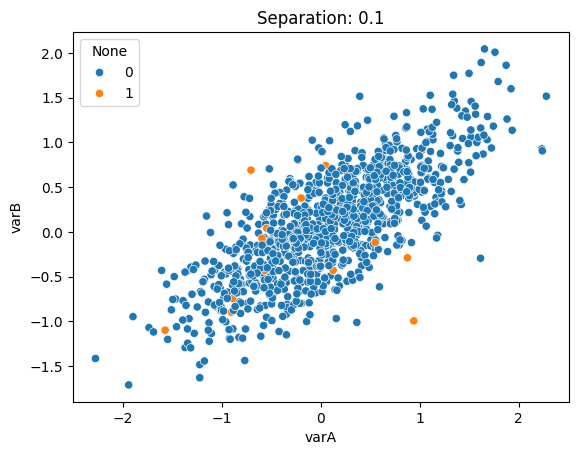

0    983
1     17
Name: count, dtype: int64


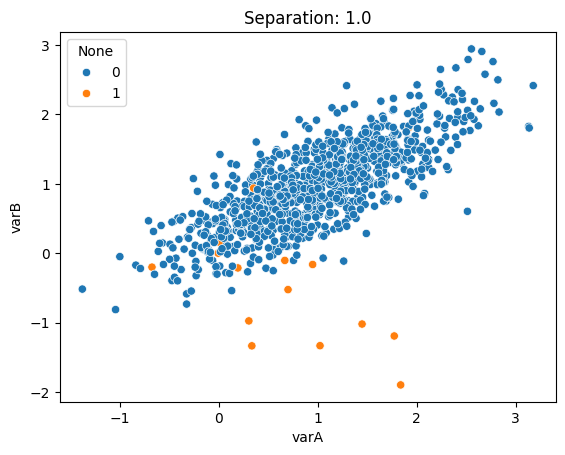

0    983
1     17
Name: count, dtype: int64


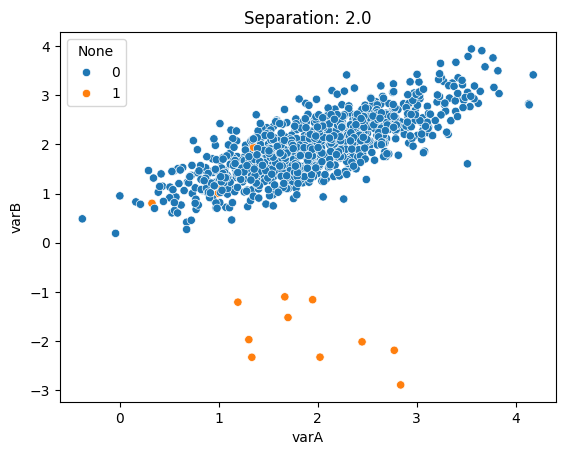

In [3]:
# make datasets with different class separateness
# and plot
for sep in [0.1, 1., 2.]:
    X, y = make_data(sep)
    print(y.value_counts())

    sns.scatterplot(data=X, x='varA', y='varB', hue=y)
    plt.title('Separation: {}'.format(sep))
    plt.show()

As we increase the parameter `sep`, the minority and majority class show less degree of overlap.

## Repeated Edited Nearest Neighbours

### Well separated classes

In [4]:
# create data
X, y = make_data(sep=2)

# set up repeated edited nearest neighbour
renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=-1,
    max_iter=100,   # maximum number of iterations
)

X_resampled, y_resampled = renn.fit_resample(X, y)

In [5]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((967, 2), (967,))

The procedure removed a few observations closer to the minority class.

In [12]:
# number of minority class observations
y.value_counts()

0    983
1     17
Name: count, dtype: int64

In [13]:
# number of majority class observations after undersampling
y_resampled.value_counts()

0    950
1     17
Name: count, dtype: int64

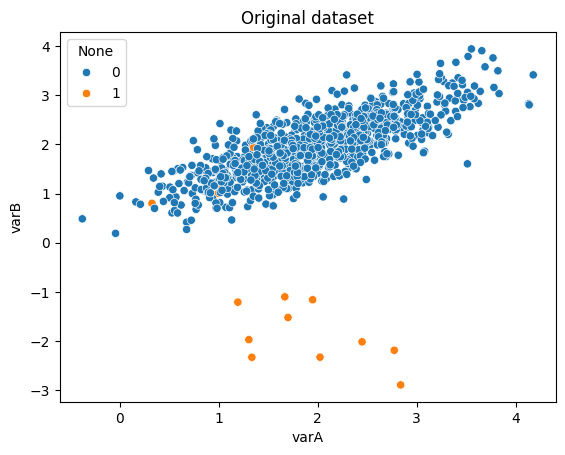

In [14]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

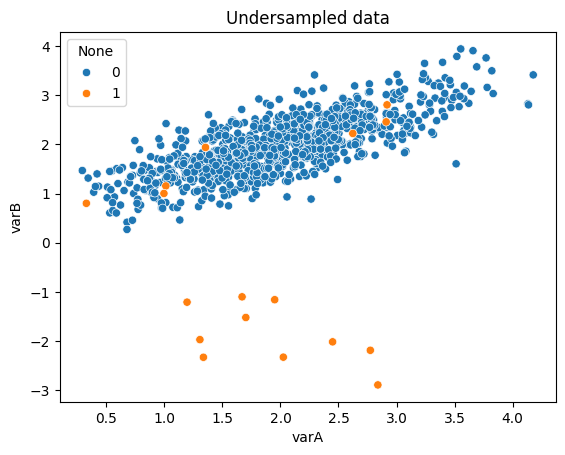

In [15]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

Note how some yellow dots can now be seen clearer, as their neighbouring observations from the other class were removed from the data set.

In [16]:
# the number of iterations that were actually
# run, if less than max_iter, it means that the 
# procedure stopped earlier.

renn.n_iter_

4

We see that only 4 iterations were run.

### Partially separated classes

In [20]:
# create data
X, y = make_data(sep=0.1)

# set up repeated edited nearest neighbour
renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=-1,
    max_iter=100,   # maximum number of iterations
)

X_resampled, y_resampled = renn.fit_resample(X, y)

In [21]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [22]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((937, 2), (937,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

Also compare the result from RENN in this notebook, with that of ENN in the previous notebook. You will see that RENN removes more samples from the original dataset.

In [23]:
# number of minority class observations
y.value_counts()

0    983
1     17
Name: count, dtype: int64

In [24]:
# number of majority class observations after undersampling
y_resampled.value_counts()

0    920
1     17
Name: count, dtype: int64

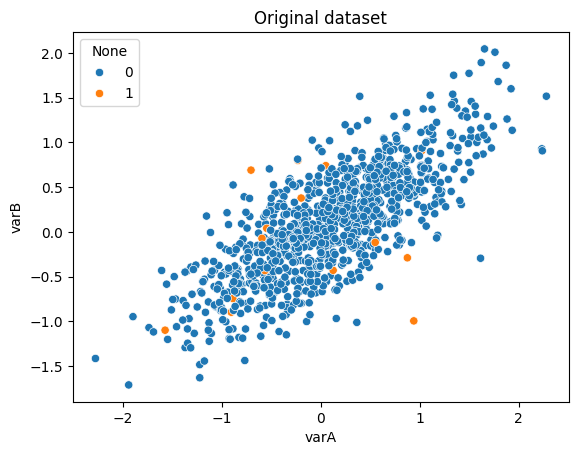

In [25]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

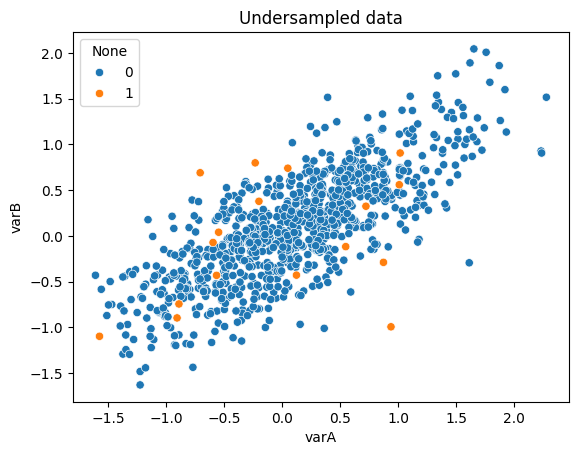

In [26]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

Notice again, that observations have been cleared from the surroundings of those of the minority class.

In [27]:
# the number of iterations that were actually
# run, if less than max_iter, it means that the 
# procedure stopped earlier.

renn.n_iter_

4

We see that only 4 iterations were run.

## Repeated Edited Nearest Neighbours
### Real data - Performance comparison
Does it work well with real datasets?

In [28]:
# Load data
data = pd.read_csv('../datasets/kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [29]:
# imbalanced target
data['target'].value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [31]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [32]:
# repeated ENN
renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    n_jobs=-1,
    kind_sel='all',
    max_iter=100,
)

X_renn, y_renn = renn.fit_resample(X_train, y_train)

In [33]:
# compare shapes
X_train.shape, X_renn.shape

((102025, 74), (101130, 74))

In [34]:
# the number of iterations that were actually
# run, if less than max_iter, it means that the 
# procedure stopped earlier

renn.n_iter_

5

## Plot data

Text(0.5, 1.0, 'Original data')

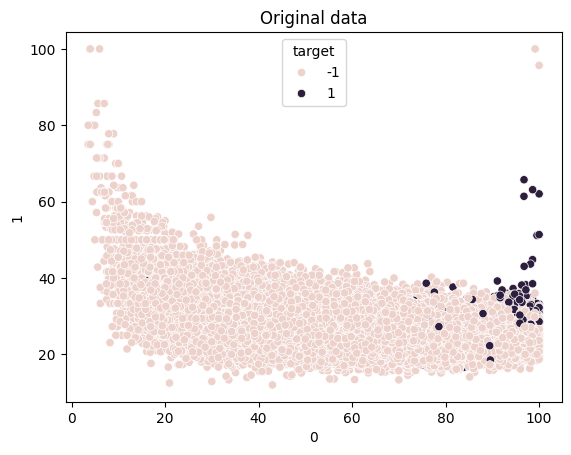

In [35]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

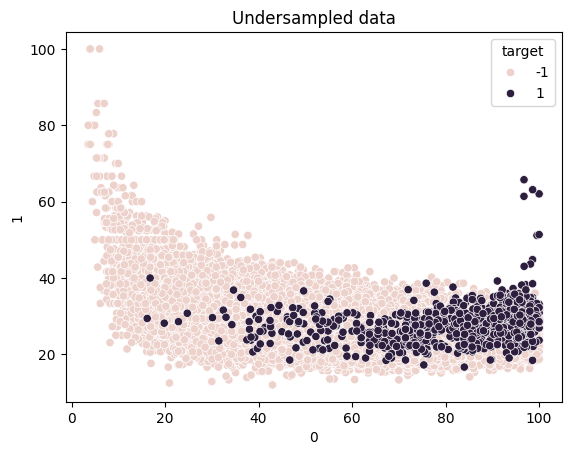

In [36]:
# undersampled data

sns.scatterplot(data=X_renn,
                x="0",
                y="1",
                hue=y_renn)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

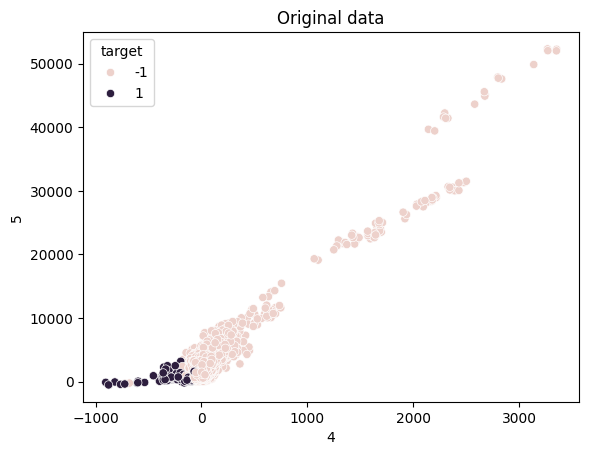

In [37]:
# original data - other set of variables

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

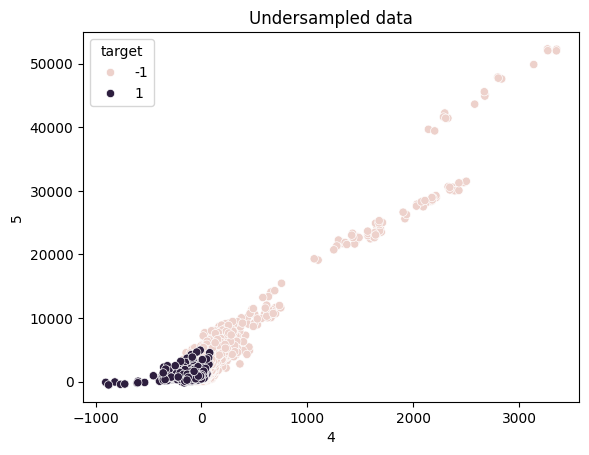

In [38]:
# undersampled data

sns.scatterplot(data=X_renn,
                x="4",
                y="5",
                hue=y_renn)

plt.title('Undersampled data')

## Machine learning performance comparison

In [39]:
# function to train random forests and evaluate the performance
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [40]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [41]:
# evaluate performance of algorithm built
# using undersampled dataset
run_randomForests(X_renn, X_test, y_renn, y_test)

Train set
Random Forests roc-auc: 0.9751419136322552
Test set
Random Forests roc-auc: 0.9739578301630578


The performance seems to improved a little bit